In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

from IS2ML_utils import *

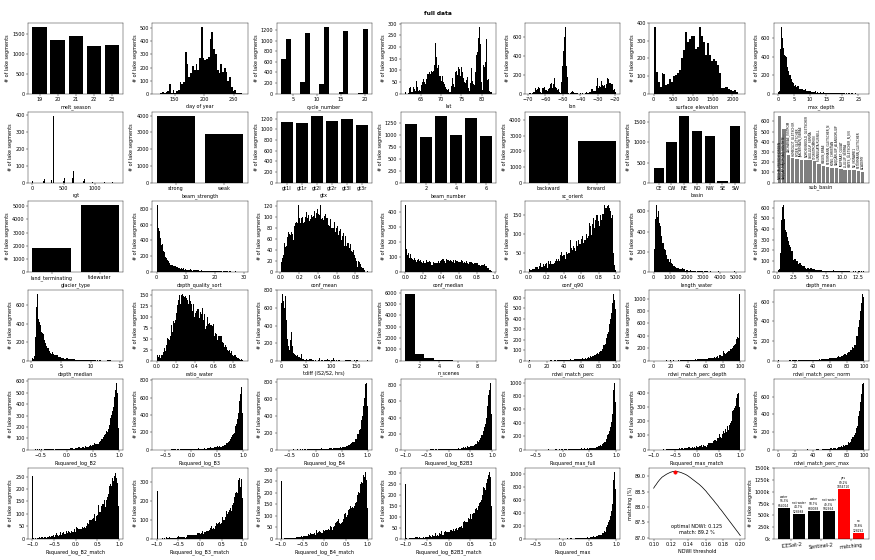

In [2]:
fn_info = 'training_data_gris/lake_segment_properties.parquet'
fn_data = 'training_data_gris/lake_segments_depth_reflectance_S2.parquet'
df_info = pd.read_parquet(fn_info)
df_data = pd.read_parquet(fn_data)

plt.close('all')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['black'])

fig, axs = plt.subplots(nrows=6, ncols=7, figsize=[25,16], dpi=35)
axs = axs.flatten()

ax = axs[0]
seasons = df_info.groupby('melt_season')['ice_sheet'].count()
ax.bar([str(x)[2:] for x in seasons.index], seasons)
ax.set_xlabel('melt_season')

ax = axs[1]
doy = df_info.date_time.apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').timetuple().tm_yday)
ax.hist(doy, bins=np.arange(119.5,268.5, 3))
ax.set_xlabel('day of year')

ax = axs[2]
ax.hist(df_info.cycle_number, bins=np.arange(2.5,21.5))
ax.set_xlabel('cycle_number')

ax = axs[3]
ax.hist(df_info.lat, bins=100)
ax.set_xlabel('lat')

ax = axs[4]
ax.hist(df_info.lon, bins=100)
ax.set_xlabel('lon')

ax = axs[5]
ax.hist(df_info.surface_elevation, bins=np.arange(0, 2250, 50))
ax.set_xlabel('surface_elevation')

ax = axs[6]
ax.hist(df_info.max_depth[df_info.max_depth!=0], bins=100)
ax.set_xlabel('max_depth')

ax = axs[7]
ax.hist(df_info.rgt, bins=np.arange(0.5, 1387.5))
ax.set_xlabel('rgt')

ax = axs[8]
strengths = df_info.groupby('beam_strength')['ice_sheet'].count()
ax.bar(strengths.index, strengths)
ax.set_xlabel('beam_strength')

ax = axs[9]
gtxs = df_info.groupby('gtx')['ice_sheet'].count()
ax.bar(gtxs.index, gtxs)
ax.set_xlabel('gtx')

ax = axs[10]
nrs = df_info.groupby('beam_number')['ice_sheet'].count()
ax.bar(nrs.index, nrs)
ax.set_xlabel('beam_number')

ax = axs[11]
orients = df_info.groupby('sc_orient')['ice_sheet'].count()
ax.bar(orients.index, orients)
ax.set_xlabel('sc_orient')

ax = axs[12]
basins = df_info.groupby('basin')['ice_sheet'].count()
ax.bar(basins.index, basins)
ax.set_xlabel('basin')

ax = axs[13]
subs = df_info.groupby('sub_basin')['ice_sheet'].count().sort_values(ascending=False).iloc[:20]
bars = ax.bar(subs.index, subs, alpha=0.5)
for ib, bar in enumerate(bars):
    yval = bar.get_height()
    ypos = subs.max()/20 if yval > (subs.max()*1.05/2) else yval + (subs.max()*1.05 - yval)/20
    label = subs.index[ib] if len(subs.index[ib]) <= 25 else subs.index[ib][:23] + '...'
    ax.text(bar.get_x() + bar.get_width() / 2, ypos, label, ha='center', va='bottom', rotation='vertical', fontsize=6)
ax.set_xticks([])
ax.set_xlabel('sub_basin')

ax = axs[14]
basins = df_info.groupby('glacier_type')['ice_sheet'].count()
ax.bar(basins.index, basins)
ax.set_xlabel('glacier_type')

ax = axs[15]
ax.hist(df_info.depth_quality_sort, bins=np.arange(0,30, 0.3))
ax.set_xlabel('depth_quality_sort')

ax = axs[16]
ax.hist(df_info.conf_mean, bins=100)
ax.set_xlabel('conf_mean')

ax = axs[17]
ax.hist(df_info.conf_median, bins=100)
ax.set_xlabel('conf_median')

ax = axs[18]
ax.hist(df_info.conf_q90, bins=100)
ax.set_xlabel('conf_q90')

ax = axs[19]
ax.hist(df_info.length_water, bins=100)
ax.set_xlabel('length_water')

ax = axs[20]
ax.hist(df_info.depth_mean, bins=100)
ax.set_xlabel('depth_mean')

ax = axs[21]
ax.hist(df_info.depth_median, bins=100)
ax.set_xlabel('depth_median')

ax = axs[22]
ax.hist(df_info.ratio_water, bins=100)
ax.set_xlabel('ratio_water')

ax = axs[23]
ax.hist(df_info.tdiff_sec_mean/3600, bins=100)
ax.set_xlabel('tdiff (IS2/S2, hrs)')

ax = axs[24]
ax.hist(df_info.n_scenes, bins=np.arange(0.5,10.5))
ax.set_xlabel('n_scenes')

ax = axs[34]
ax.hist(df_info.ndwi_match_perc_max, bins=100)
ax.set_xlabel('ndwi_match_perc_max')

ax = axs[25]
ax.hist(df_info.ndwi_match_perc, bins=100)
ax.set_xlabel('ndwi_match_perc')

ax = axs[26]
ax.hist(df_info.ndwi_match_perc_depth, bins=100)
ax.set_xlabel('ndwi_match_perc_depth')

ax = axs[27]
ax.hist(df_info.ndwi_match_perc_norm, bins=100)
ax.set_xlabel('ndwi_match_perc_norm')

ax = axs[28]
ax.hist(df_info.Rsquared_log_B2, bins=100)
ax.set_xlabel('Rsquared_log_B2')

ax = axs[29]
ax.hist(df_info.Rsquared_log_B3, bins=100)
ax.set_xlabel('Rsquared_log_B3')

ax = axs[30]
ax.hist(df_info.Rsquared_log_B4, bins=100)
ax.set_xlabel('Rsquared_log_B4')

ax = axs[31]
ax.hist(df_info.Rsquared_log_B2B3, bins=100)
ax.set_xlabel('Rsquared_log_B2B3')

ax = axs[35]
ax.hist(df_info.Rsquared_log_B2_match, bins=100)
ax.set_xlabel('Rsquared_log_B2_match')

ax = axs[36]
ax.hist(df_info.Rsquared_log_B3_match, bins=100)
ax.set_xlabel('Rsquared_log_B3_match')

ax = axs[37]
ax.hist(df_info.Rsquared_log_B4_match, bins=100)
ax.set_xlabel('Rsquared_log_B4_match')

ax = axs[38]
ax.hist(df_info.Rsquared_log_B2B3_match, bins=100)
ax.set_xlabel('Rsquared_log_B2B3_match')

ax = axs[32]
ax.hist(df_info.Rsquared_max_full, bins=100)
ax.set_xlabel('Rsquared_max_full')

ax = axs[33]
ax.hist(df_info.Rsquared_max_match, bins=100)
ax.set_xlabel('Rsquared_max_match')

ax = axs[39]
ax.hist(df_info.Rsquared_max, bins=100)
ax.set_xlabel('Rsquared_max')

ax = axs[40]
step = 0.0001
threshs_ = np.arange(0.1, 0.2+step/2, step)
smooth_width = 0.005
wdw = int(np.ceil(smooth_width/step))
is_depth_IS2 = df_data.depth > 0
agree_perc = []
for i, thresh in enumerate(threshs_):
    is_depth_S2 = df_data.ndwi >= thresh
    do_agree = is_depth_IS2 == is_depth_S2
    agree_perc.append(do_agree.mean() * 100)
agree_perc_smooth = pd.Series(agree_perc).rolling(window=wdw*5, center=True, min_periods=1, win_type='gaussian').mean(std=wdw/2)
opt_thresh = threshs_[np.argmax(agree_perc_smooth)]
opt_match = agree_perc_smooth.max()
ax.plot(threshs_, agree_perc)
ax.text(0.5, 0.05, 'optimal NDWI: %g\nmatch: %.1f %%' % (opt_thresh, opt_match), ha='center', va='bottom', transform=ax.transAxes)
ax.scatter(opt_thresh, opt_match, s=50, color='r', zorder=10)

ax = axs[41]
is_depth_IS2 = df_data.depth > 0
depth_is2 = is_depth_IS2.sum()
nodepth_is2 = (~is_depth_IS2).sum()
is_depth_S2 = df_data.ndwi >= opt_thresh
depth_s2 = is_depth_S2.sum()
nodepth_s2 = (~is_depth_S2).sum()
do_agree = is_depth_IS2 == is_depth_S2
agree = do_agree.sum()
noagree = (~do_agree).sum()
bars1 = ax.bar([0,1], [depth_is2, nodepth_is2])
bars2 = ax.bar([2,3], [depth_s2, nodepth_s2])
bars3 = ax.bar([4,5], [agree, noagree], color='r')
labs = ['water', 'not water', 'water', 'not water', 'yes', 'no']
percs = [is_depth_IS2.mean()*100, (1-is_depth_IS2.mean())*100,
         is_depth_S2.mean()*100, (1-is_depth_S2.mean())*100,
         do_agree.mean()*100, (1-do_agree.mean())*100]
bars = [*bars1, *bars2, *bars3]
maxval = 0
for ib, bar in enumerate(bars):
    yval = bar.get_height()
    xpos = bar.get_x() + bar.get_width() / 2
    label = '%s\n%.1f%%\n%i' % (labs[ib], percs[ib], yval)
    ax.text(xpos, yval, label, ha='center', va='bottom', fontsize=6)
    maxval = np.max((maxval, yval))
ax.set_ylim((0, 1.2*maxval))
yt = ax.get_yticks()
ax.set_yticks(yt, ['%ik'%(y/1000) for y in yt])
ax.set_xticks([0.5, 2.5, 4.5], labels=['ICESat-2', 'Sentinel-2', 'matching'], rotation=6)

for ax in axs:
    ax.set_ylabel('# of lake segments')

ax = axs[40]
ax.set_ylabel('matching (%)')
ax.set_xlabel('NDWI threshold')

supt = 'full data lake segment properties'
fig.suptitle(supt + '\n', fontweight='bold')

fig.tight_layout(h_pad=0, w_pad=0)
fig.savefig('plots/lake_segment_properties.jpg', dpi=300)

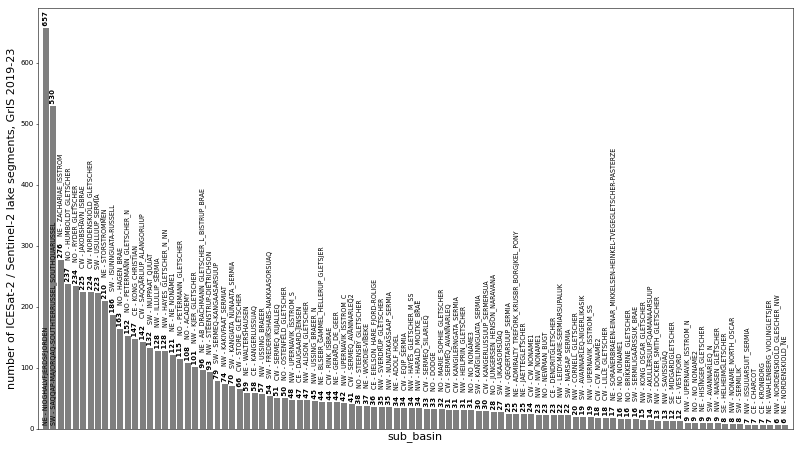

In [3]:
fig, ax = plt.subplots(figsize=[16,9], dpi=50)
nbars = 100
subs = df_info.groupby('sub_basin')[['ice_sheet']].count().join(df_info.groupby('sub_basin')['basin'].first()).sort_values(by='ice_sheet', ascending=False).iloc[:nbars]
regs = subs.basin.copy()
subs = subs.ice_sheet.copy()
bars = ax.bar(subs.index, subs, alpha=0.5)
for ib, bar in enumerate(bars):
    yval = bar.get_height()
    ypos = subs.max()/100 if yval > (subs.max()*1.05/2) else yval
    label = subs.index[ib] if len(subs.index[ib]) <= 75 else subs.index[ib][:73] + '...'
    labeladd = '' if yval > (subs.max()*1.05/2) else ' '*(int(np.log10(yval)+2)*3)
    label = labeladd + '%s - %s' % (regs.iloc[ib], label)
    ax.text(bar.get_x() + bar.get_width() / 2, ypos, label, ha='center', va='bottom', rotation='vertical', fontsize=9)
    ax.text(bar.get_x() + bar.get_width() / 2, yval, ' %s'%int(yval), ha='center', va='bottom', rotation='vertical', fontweight='bold')
ax.set_xlabel('sub_basin', fontsize=16)
ax.set_ylabel('number of ICESat-2 / Sentinel-2 lake segments, GrIS 2019-23', fontsize=16)
ax.set_xticks([])
ax.set_xlim([-1,nbars])
fig.tight_layout()
fig.savefig('plots/sub_basin_distribution.jpg', dpi=300)

In [5]:
df_info = pd.read_parquet(fn_info)
df_data = pd.read_parquet(fn_data)

conf_thresh = 0.3

threshs = [
    ('conf_q90', 'greater', 0.5),
    ('tdiff_sec_max', 'less', 48*3600),
    ('ndwi_match_perc', 'greater', 85),
    ('ndwi_match_perc_depth', 'greater', 70),
    ('Rsquared_max', 'greater', 0.75),
    ('Rsquared_max_full', 'greater', 0.5),
    ('Rsquared_max_match', 'greater', 0.5),
    ('depth_quality_sort', 'greater', 2.0),
]

icond = 0
print('[%2i]: %5i (total number)' % (icond, len(df_info)))
combined = pd.Series(True, index=df_info.index)

for it, th in enumerate(threshs):
    if th[1] == 'greater':
        arr = df_info[th[0]] >= th[2]
    elif th[1] == 'less':
        arr = df_info[th[0]] <= th[2]
    elif th[1] == 'equal':
        arr = df_info[th[0]] <= th[2]
    else:
        warnings.warn('Selected relation "%s" not in ["equal", "greater","less"]. Not applying any filter.')
        arr = pd.Series(True, index=df_info.index)

    count_condition = arr.sum()
    icond += 1
    print('[%2i]: %5i (%s %s %s)' % (icond, count_condition, th[0], th[1], th[2]))

    combined = combined & arr
    count_combined = combined.sum()

    if icond > 1:
        icond += 1
        print('    ---> [%2i]: %5i ([%2i] and [%2i])' % (icond, count_combined, icond-2, icond-1))

print('\n%s lake segments fulfill all the requested conditions.' % count_combined)

# apply conditions to info
dfi = df_info[combined].copy()

# apply conditions to data
select_data = df_data.apply(lambda x: x.IS2_id in dfi.index, axis=1)
dfd = df_data[select_data].copy()

# apply confidence threshold to the data
select_conf = dfd.conf > conf_thresh
dfd = dfd[select_conf]

fn_out_info = 'data_paper/lake_segments_info.parquet'
fn_out_data = 'data_paper/lake_segments_depth_reflectance_data.parquet'

dfd.to_parquet(fn_out_data)
print('\n--> saved file as %s' % fn_out_data)

dfi.to_parquet(fn_out_info)
print('--> saved file as %s' % fn_out_info)

[ 0]:  6945 (total number)
[ 1]:  5602 (conf_q90 greater 0.5)
[ 2]:  6373 (tdiff_sec_max less 172800)
    ---> [ 3]:  5127 ([ 1] and [ 2])
[ 4]:  5451 (ndwi_match_perc greater 85)
    ---> [ 5]:  4139 ([ 3] and [ 4])
[ 6]:  5801 (ndwi_match_perc_depth greater 70)
    ---> [ 7]:  3990 ([ 5] and [ 6])
[ 8]:  6064 (Rsquared_max greater 0.75)
    ---> [ 9]:  3777 ([ 7] and [ 8])
[10]:  6573 (Rsquared_max_full greater 0.5)
    ---> [11]:  3772 ([ 9] and [10])
[12]:  5292 (Rsquared_max_match greater 0.5)
    ---> [13]:  3322 ([11] and [12])
[14]:  3337 (depth_quality_sort greater 2.0)
    ---> [15]:  2241 ([13] and [14])

2241 lake segments fulfill all the requested conditions.

--> saved file as data_paper/lake_segments_depth_reflectance_data.csv
--> saved file as data_paper/lake_segments_info.csv


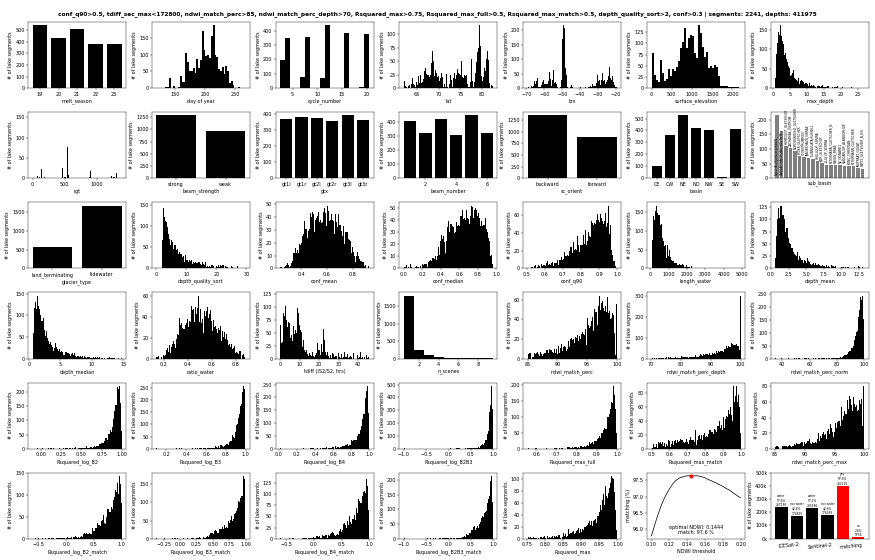

In [6]:
fn_info = 'data_paper/lake_segments_info.parquet'
fn_data = 'data_paper/lake_segments_depth_reflectance_data.parquet'

df_info = pd.read_parquet(fn_info)
df_data = pd.read_parquet(fn_data)

plt.close('all')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['black'])

fig, axs = plt.subplots(nrows=6, ncols=7, figsize=[25,16], dpi=35)
axs = axs.flatten()

ax = axs[0]
seasons = df_info.groupby('melt_season')['ice_sheet'].count()
ax.bar([str(x)[2:] for x in seasons.index], seasons)
ax.set_xlabel('melt_season')

ax = axs[1]
doy = df_info.date_time.apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').timetuple().tm_yday)
ax.hist(doy, bins=np.arange(119.5,268.5, 3))
ax.set_xlabel('day of year')

ax = axs[2]
ax.hist(df_info.cycle_number, bins=np.arange(2.5,21.5))
ax.set_xlabel('cycle_number')

ax = axs[3]
ax.hist(df_info.lat, bins=100)
ax.set_xlabel('lat')

ax = axs[4]
ax.hist(df_info.lon, bins=100)
ax.set_xlabel('lon')

ax = axs[5]
ax.hist(df_info.surface_elevation, bins=np.arange(0, 2250, 50))
ax.set_xlabel('surface_elevation')

ax = axs[6]
ax.hist(df_info.max_depth[df_info.max_depth!=0], bins=100)
ax.set_xlabel('max_depth')

ax = axs[7]
ax.hist(df_info.rgt, bins=np.arange(0.5, 1387.5))
ax.set_xlabel('rgt')

ax = axs[8]
strengths = df_info.groupby('beam_strength')['ice_sheet'].count()
ax.bar(strengths.index, strengths)
ax.set_xlabel('beam_strength')

ax = axs[9]
gtxs = df_info.groupby('gtx')['ice_sheet'].count()
ax.bar(gtxs.index, gtxs)
ax.set_xlabel('gtx')

ax = axs[10]
nrs = df_info.groupby('beam_number')['ice_sheet'].count()
ax.bar(nrs.index, nrs)
ax.set_xlabel('beam_number')

ax = axs[11]
orients = df_info.groupby('sc_orient')['ice_sheet'].count()
ax.bar(orients.index, orients)
ax.set_xlabel('sc_orient')

ax = axs[12]
basins = df_info.groupby('basin')['ice_sheet'].count()
ax.bar(basins.index, basins)
ax.set_xlabel('basin')

ax = axs[13]
subs = df_info.groupby('sub_basin')['ice_sheet'].count().sort_values(ascending=False).iloc[:20]
bars = ax.bar(subs.index, subs, alpha=0.5)
for ib, bar in enumerate(bars):
    yval = bar.get_height()
    ypos = subs.max()/20 if yval > (subs.max()*1.05/2) else yval + (subs.max()*1.05 - yval)/20
    label = subs.index[ib] if len(subs.index[ib]) <= 25 else subs.index[ib][:23] + '...'
    ax.text(bar.get_x() + bar.get_width() / 2, ypos, label, ha='center', va='bottom', rotation='vertical', fontsize=6)
ax.set_xticks([])
ax.set_xlabel('sub_basin')

ax = axs[14]
basins = df_info.groupby('glacier_type')['ice_sheet'].count()
ax.bar(basins.index, basins)
ax.set_xlabel('glacier_type')

ax = axs[15]
ax.hist(df_info.depth_quality_sort, bins=np.arange(0,30, 0.3))
ax.set_xlabel('depth_quality_sort')

ax = axs[16]
ax.hist(df_info.conf_mean, bins=100)
ax.set_xlabel('conf_mean')

ax = axs[17]
ax.hist(df_info.conf_median, bins=100)
ax.set_xlabel('conf_median')

ax = axs[18]
ax.hist(df_info.conf_q90, bins=100)
ax.set_xlabel('conf_q90')

ax = axs[19]
ax.hist(df_info.length_water, bins=100)
ax.set_xlabel('length_water')

ax = axs[20]
ax.hist(df_info.depth_mean, bins=100)
ax.set_xlabel('depth_mean')

ax = axs[21]
ax.hist(df_info.depth_median, bins=100)
ax.set_xlabel('depth_median')

ax = axs[22]
ax.hist(df_info.ratio_water, bins=100)
ax.set_xlabel('ratio_water')

ax = axs[23]
ax.hist(df_info.tdiff_sec_mean/3600, bins=100)
ax.set_xlabel('tdiff (IS2/S2, hrs)')

ax = axs[24]
ax.hist(df_info.n_scenes, bins=np.arange(0.5,10.5))
ax.set_xlabel('n_scenes')

ax = axs[34]
ax.hist(df_info.ndwi_match_perc_max, bins=100)
ax.set_xlabel('ndwi_match_perc_max')

ax = axs[25]
ax.hist(df_info.ndwi_match_perc, bins=100)
ax.set_xlabel('ndwi_match_perc')

ax = axs[26]
ax.hist(df_info.ndwi_match_perc_depth, bins=100)
ax.set_xlabel('ndwi_match_perc_depth')

ax = axs[27]
ax.hist(df_info.ndwi_match_perc_norm, bins=100)
ax.set_xlabel('ndwi_match_perc_norm')

ax = axs[28]
ax.hist(df_info.Rsquared_log_B2, bins=100)
ax.set_xlabel('Rsquared_log_B2')

ax = axs[29]
ax.hist(df_info.Rsquared_log_B3, bins=100)
ax.set_xlabel('Rsquared_log_B3')

ax = axs[30]
ax.hist(df_info.Rsquared_log_B4, bins=100)
ax.set_xlabel('Rsquared_log_B4')

ax = axs[31]
ax.hist(df_info.Rsquared_log_B2B3, bins=100)
ax.set_xlabel('Rsquared_log_B2B3')

ax = axs[35]
ax.hist(df_info.Rsquared_log_B2_match, bins=100)
ax.set_xlabel('Rsquared_log_B2_match')

ax = axs[36]
ax.hist(df_info.Rsquared_log_B3_match, bins=100)
ax.set_xlabel('Rsquared_log_B3_match')

ax = axs[37]
ax.hist(df_info.Rsquared_log_B4_match, bins=100)
ax.set_xlabel('Rsquared_log_B4_match')

ax = axs[38]
ax.hist(df_info.Rsquared_log_B2B3_match, bins=100)
ax.set_xlabel('Rsquared_log_B2B3_match')

ax = axs[32]
ax.hist(df_info.Rsquared_max_full, bins=100)
ax.set_xlabel('Rsquared_max_full')

ax = axs[33]
ax.hist(df_info.Rsquared_max_match, bins=100)
ax.set_xlabel('Rsquared_max_match')

ax = axs[39]
ax.hist(df_info.Rsquared_max, bins=100)
ax.set_xlabel('Rsquared_max')

ax = axs[40]
step = 0.0001
threshs_ = np.arange(0.1, 0.2+step/2, step)
smooth_width = 0.005
wdw = int(np.ceil(smooth_width/step))
is_depth_IS2 = df_data.depth > 0
agree_perc = []
for i, thresh in enumerate(threshs_):
    is_depth_S2 = df_data.ndwi >= thresh
    do_agree = is_depth_IS2 == is_depth_S2
    agree_perc.append(do_agree.mean() * 100)
agree_perc_smooth = pd.Series(agree_perc).rolling(window=wdw*5, center=True, min_periods=1, win_type='gaussian').mean(std=wdw/2)
opt_thresh = threshs_[np.argmax(agree_perc_smooth)]
opt_match = agree_perc_smooth.max()
ax.plot(threshs_, agree_perc)
ax.text(0.5, 0.05, 'optimal NDWI: %g\nmatch: %.1f %%' % (opt_thresh, opt_match), ha='center', va='bottom', transform=ax.transAxes)
ax.scatter(opt_thresh, opt_match, s=50, color='r', zorder=10)

ax = axs[41]
is_depth_IS2 = df_data.depth > 0
depth_is2 = is_depth_IS2.sum()
nodepth_is2 = (~is_depth_IS2).sum()
is_depth_S2 = df_data.ndwi >= opt_thresh
depth_s2 = is_depth_S2.sum()
nodepth_s2 = (~is_depth_S2).sum()
do_agree = is_depth_IS2 == is_depth_S2
agree = do_agree.sum()
noagree = (~do_agree).sum()
bars1 = ax.bar([0,1], [depth_is2, nodepth_is2])
bars2 = ax.bar([2,3], [depth_s2, nodepth_s2])
bars3 = ax.bar([4,5], [agree, noagree], color='r')
labs = ['water', 'not water', 'water', 'not water', 'yes', 'no']
percs = [is_depth_IS2.mean()*100, (1-is_depth_IS2.mean())*100,
         is_depth_S2.mean()*100, (1-is_depth_S2.mean())*100,
         do_agree.mean()*100, (1-do_agree.mean())*100]
bars = [*bars1, *bars2, *bars3]
maxval = 0
for ib, bar in enumerate(bars):
    yval = bar.get_height()
    xpos = bar.get_x() + bar.get_width() / 2
    label = '%s\n%.1f%%\n%i' % (labs[ib], percs[ib], yval)
    ax.text(xpos, yval, label, ha='center', va='bottom', fontsize=6)
    maxval = np.max((maxval, yval))
ax.set_ylim((0, 1.2*maxval))
yt = ax.get_yticks()
ax.set_yticks(yt, ['%ik'%(y/1000) for y in yt])
ax.set_xticks([0.5, 2.5, 4.5], labels=['ICESat-2', 'Sentinel-2', 'matching'], rotation=6)

for ax in axs:
    ax.set_ylabel('# of lake segments')

ax = axs[40]
ax.set_ylabel('matching (%)')
ax.set_xlabel('NDWI threshold')

rel_dict = {'greater': '>', 'less': '<', 'equal': '='}
supt = ', '.join(['%s%s%g' % (t[0], rel_dict[t[1]], t[2]) for t in threshs] + ['conf>%g' %conf_thresh])
supt += ' | segments: %i, depths: %i' % (len(df_info), len(df_data))
fig.suptitle(supt + '\n', fontweight='bold')

fig.tight_layout(h_pad=0, w_pad=0)
fig.savefig('plots/lake_segment_properties_paperselect.jpg', dpi=300)